<img src="logo.png" alt="Logo" width="150">

#    Supervivencia en el Titanic: Una historia contada con datos

## 1. Introducción

El hundimiento del Titanic es uno de los naufragios más famosos de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió tras chocar con un iceberg, resultando en la muerte de 1,502 personas de las 2,224 que viajaban a bordo.

Este análisis busca responder a la pregunta: **¿Qué factores influyeron en la supervivencia de los pasajeros?** Exploraré variables como clase social, género, edad y más para entender patrones que podrían haber determinado quién sobrevivió a esta tragedia.

A través de este análisis, no solo estaremos aplicando técnicas de ciencia de datos, sino también contando la historia humana detrás de los números, honrando la memoria de quienes estuvieron en esta tragedia.

## 2. Preparación de los Datos

Primero, carguemos las bibliotecas necesarias y exploremos el conjunto de datos:

In [21]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set(font_scale=1.2)

# Para mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Para evitar advertencias
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Cargar el dataset
df = pd.read_csv('df_titanic.csv')

# Vamo a ver las primeras filas
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2.1 Explorando el Dataset
Este dataset tiene información sobre los pasajeros del Titanic. Ahora vamos a ver la estructura:

In [23]:
# Checamos el tamaño del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Revisamos los tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Y por ultimo a mi me gusta ver si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Dimensiones del dataset: (1310, 14)

Tipos de datos:
pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Valores nulos por columna:
pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


### 2.2 Descripción de Columnas

Nuestro dataset contiene estas columnas:

- **pclass**: Clase del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase)
- **survived**: Si el pasajero sobrevivió (1) o no (0)
- **name**: Nombre del pasajero
- **sex**: Género del pasajero
- **age**: Edad del pasajero
- **sibsp**: Número de hermanos/cónyuges a bordo
- **parch**: Número de padres/hijos a bordo
- **ticket**: Número de boleto
- **fare**: Tarifa pagada
- **cabin**: Número de cabina
- **embarked**: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
- **boat**: Bote salvavidas (si sobrevivió)
- **body**: Número de identificación del cuerpo (si no sobrevivió y fue recuperado)
- **home.dest**: Destino del hogar

Hay valores nulos en varias columnas, especialmente en 'age', 'cabin', 'boat', 'body' y 'home.dest'.

In [24]:
# Estadísticas descriptivas
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### 2.3 Análisis Estadístico Preliminar

A partir de las estadísticas descriptivas podemos observar que:

- La tasa de supervivencia general fue aproximadamente del 38.2%.
- La edad promedio de los pasajeros era de aproximadamente 29.9 años, con personas desde bebés hasta ancianos de 80 años.
- La mayoría de los pasajeros viajaban solos o con pocos familiares (el promedio de sibsp es 0.5 y de parch es 0.38).
- Las tarifas variaban enormemente, desde pasajeros que no pagaron hasta aquellos que pagaron más de 500 libras esterlinas.
- La mayoría de los pasajeros viajaba en tercera clase (aproximadamente el 55%).

## 3. Limpieza y Preparación de Datos

Antes de avanzar con el análisis exploratorio, se ocupa limpiar los datos y manejar los valores faltantes.

In [25]:
# Crear una copia del DataFrame para no modificar el original
df_cleaned = df.copy()

# Verificar la cantidad de valores nulos en cada columna
missing_values = df_cleaned.isnull().sum().sort_values(ascending=False)
percent_missing = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)

missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Porcentaje'])
missing_data

,Total,Porcentaje
body,1189,90.763359
cabin,1015,77.480916
boat,824,62.900763
home.dest,565,43.129771
age,264,20.152672
embarked,3,0.229008
fare,2,0.152672
pclass,1,0.076336
survived,1,0.076336
name,1,0.076336


### 3.1 Manejo de Valores Nulos

Podemos observar que hay valores nulos en varias columnas. Asi lo arreglaré:

1. **Age (Edad)**: Voy a agregar los valores faltantes con la mediana según la clase y el género.
2. **Cabin (Cabina)**: Tiene muchos valores nulos (más del 77%). Haré una nueva variable para indicar si se conoce o no la cabina.
3. **Embarked (Puerto de embarque)**: Solo tiene 3 valores nulos, los imputaré con el valor más frecuente.
4. **Fare (Tarifa)**: Solo tiene 2 valores nulos, los imputaré con la mediana según la clase.
5. **Otras columnas**: Las columnas como 'boat', 'body' y 'home.dest' tienen relación con el resultado (supervivencia), así que no las imputaremos.

**Parte 1: Imputación de valores para Age**

In [26]:
# Creo una copia del DataFrame para no modificar el original
df_cleaned = df.copy()

# Verifico si hay valores nulos en la columna 'sex'
print("Valores nulos en columna sex:")
print(df_cleaned['sex'].isnull().sum())

# Imputar valores faltantes en 'sex'
if df_cleaned['sex'].isnull().sum() > 0:
    df_cleaned['sex'] = df_cleaned['sex'].fillna(df_cleaned['sex'].mode()[0])

# Calcular la mediana de edad por clase y sexo
age_median = df_cleaned.groupby(['pclass', 'sex'])['age'].median()

print("\nMedianas de edad por clase y sexo:")
print(age_median)

# Imputación de valores faltantes para Age de forma segura
for pclass in df_cleaned['pclass'].unique():
    for sex in df_cleaned['sex'].unique():
        if pd.notna(pclass) and pd.notna(sex):  # Nos aseguramos que pclass y sex no sean NaN
            mask = (df_cleaned['pclass'] == pclass) & (df_cleaned['sex'] == sex) & (df_cleaned['age'].isna())
            try:
                df_cleaned.loc[mask, 'age'] = age_median.loc[(pclass, sex)]
            except KeyError:
                print(f"Combinación no encontrada: pclass={pclass}, sex={sex}")
                # Si la combinación no existe, usamos la mediana general
                df_cleaned.loc[mask, 'age'] = df_cleaned['age'].median()

# Para los casos que aún tengan NaN en age
if df_cleaned['age'].isnull().sum() > 0:
    print(f"Quedan {df_cleaned['age'].isnull().sum()} valores nulos en 'age' después de la imputación principal")
    df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())

# Verifico la imputación para age
print("\nValores nulos en 'age' después de imputación:")
print(df_cleaned['age'].isnull().sum())

Valores nulos en columna sex:
1

Medianas de edad por clase y sexo:
pclass  sex   
1.0     female    36.0
        male      42.0
2.0     female    28.0
        male      29.5
3.0     female    22.0
        male      25.0
Name: age, dtype: float64
Quedan 1 valores nulos en 'age' después de la imputación principal

Valores nulos en 'age' después de imputación:
0


**Parte 2: Imputación de valores para Embarked y Fare:**

In [27]:
# Imputación para Embarked
print("Valores nulos en 'embarked' antes de imputación:")
print(df_cleaned['embarked'].isnull().sum())

# Encontramos el valor más frecuente de embarked
embarked_mode = df_cleaned['embarked'].mode()[0]
print(f"El valor más frecuente de 'embarked' es: {embarked_mode}")

# Aplicamos la imputación
df_cleaned.loc[df_cleaned['embarked'].isna(), 'embarked'] = embarked_mode

# Imputación para Fare
print("\nValores nulos en 'fare' antes de imputación:")
print(df_cleaned['fare'].isnull().sum())

# Calculamos la mediana de la tarifa por clase
fare_median = df_cleaned.groupby('pclass')['fare'].median()
print("\nMedianas de tarifa por clase:")
print(fare_median)

# Aplicamos la imputación de forma segura
for pclass in df_cleaned['pclass'].unique():
    if pd.notna(pclass):  # Nos aseguramos que pclass no sea NaN
        mask = (df_cleaned['pclass'] == pclass) & (df_cleaned['fare'].isna())
        try:
            df_cleaned.loc[mask, 'fare'] = fare_median.loc[pclass]
        except KeyError:
            print(f"Pclass {pclass} no encontrada en fare_median")
            # Si la clase no existe en fare_median, usamos la mediana general
            df_cleaned.loc[mask, 'fare'] = df_cleaned['fare'].median()

# Para los casos que aún tengan NaN en fare
if df_cleaned['fare'].isnull().sum() > 0:
    print(f"Quedan {df_cleaned['fare'].isnull().sum()} valores nulos en 'fare' después de la imputación principal")
    df_cleaned['fare'] = df_cleaned['fare'].fillna(df_cleaned['fare'].median())

# Verificamos las imputaciones
print("\nValores nulos después de imputación:")
print(df_cleaned[['embarked', 'fare']].isnull().sum())

Valores nulos en 'embarked' antes de imputación:
3
El valor más frecuente de 'embarked' es: S

Valores nulos en 'fare' antes de imputación:
2

Medianas de tarifa por clase:
pclass
1.0    60.0000
2.0    15.0458
3.0     8.0500
Name: fare, dtype: float64
Quedan 1 valores nulos en 'fare' después de la imputación principal

Valores nulos después de imputación:
embarked    0
fare        0
dtype: int64


**Parte 3: Creación de variable para Cabin y verificación final**

In [28]:
# Creo una nueva variable para Cabin
print("Valores nulos en 'cabin':")
print(df_cleaned['cabin'].isnull().sum())
print(f"Porcentaje de valores nulos en 'cabin': {df_cleaned['cabin'].isnull().mean() * 100:.2f}%")

# Agrego la variable que indica si el pasajero tiene información de cabina
df_cleaned['has_cabin'] = df_cleaned['cabin'].notna().astype(int)

# Verificamos la distribución de la nueva variable
print("\nDistribución de 'has_cabin':")
print(df_cleaned['has_cabin'].value_counts())
print(f"Porcentaje de pasajeros con cabina conocida: {df_cleaned['has_cabin'].mean() * 100:.2f}%")

# Verificamos que todas las imputaciones se hayan realizado correctamente
print("\nValores nulos actualizados en las columnas principales:")
print(df_cleaned[['age', 'embarked', 'fare', 'has_cabin']].isnull().sum())

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame después de la limpieza:")
df_cleaned.head()

Valores nulos en 'cabin':
1015
Porcentaje de valores nulos en 'cabin': 77.48%

Distribución de 'has_cabin':
has_cabin
0    1015
1     295
Name: count, dtype: int64
Porcentaje de pasajeros con cabina conocida: 22.52%

Valores nulos actualizados en las columnas principales:
age          0
embarked     0
fare         0
has_cabin    0
dtype: int64

Primeras filas del DataFrame después de la limpieza:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


### 3.2 Extracción y Clasificación de Títulos

Podemos extraer información adicional de la columna 'name', específicamente el título de cada pasajero. Esto podría ser útil ya que refleja el estatus social, la edad y el estado civil.

In [29]:
# Extraigo títulos del nombre
df_cleaned['title'] = df_cleaned['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Contar frecuencia de cada título
print("Frecuencia de cada título:")
print(df_cleaned['title'].value_counts())

# Simplificar títulos menos comunes
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Ms': 'Mrs'
}

# Aplicar mapeo y agrupar títulos poco frecuentes
df_cleaned['title'] = df_cleaned['title'].map(title_mapping)
df_cleaned['title'] = df_cleaned['title'].fillna('Rare')

# Verificar el resultado final
print("\nDistribución de títulos después de la simplificación:")
print(df_cleaned['title'].value_counts())

Frecuencia de cada título:
title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: count, dtype: int64

Distribución de títulos después de la simplificación:
title
Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Rare         2
Name: count, dtype: int64


### 3.3 Creación de Características Adicionales

Vamos a crear algunas características adicionales que pueden ser útiles para nuestro análisis:

1. **FamilySize**: Número total de familiares a bordo (sibsp + parch + 1, incluyendo al pasajero)
2. **IsAlone**: Indica si el pasajero viajaba solo o no
3. **Age_Group**: Categorización de las edades en grupos

In [30]:
# Crear FamilySize
df_cleaned['family_size'] = df_cleaned['sibsp'] + df_cleaned['parch'] + 1

# Crear IsAlone
df_cleaned['is_alone'] = (df_cleaned['family_size'] == 1).astype(int)

# Crear Age_Group
df_cleaned['age_group'] = pd.cut(
    df_cleaned['age'],
    bins=[0, 5, 12, 18, 35, 60, 100],
    labels=['Bebé', 'Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Anciano']
)

# Verificamos las nuevas características
print("Distribución de Family Size:")
print(df_cleaned['family_size'].value_counts().sort_index())

print("\nDistribución de Is Alone:")
print(df_cleaned['is_alone'].value_counts())
print(f"Porcentaje de pasajeros que viajaban solos: {df_cleaned['is_alone'].mean() * 100:.2f}%")

print("\nDistribución de Age Group:")
print(df_cleaned['age_group'].value_counts())

# Verificar si hay valores nulos en pclass
print("\nValores nulos en pclass:")
print(df_cleaned['pclass'].isnull().sum())

# Primero rellenar los valores nulos en pclass si los hay
if df_cleaned['pclass'].isnull().sum() > 0:
    # Podemos usar el valor más frecuente
    df_cleaned['pclass'] = df_cleaned['pclass'].fillna(df_cleaned['pclass'].mode()[0])
    print(f"Se han imputado {df_cleaned['pclass'].isnull().sum()} valores nulos en pclass")

# Ahora convertir a entero y luego a categoría
df_cleaned['pclass'] = df_cleaned['pclass'].astype(float).astype(int).astype('category')

# Visualizamos el DataFrame con las nuevas características
print("\nPrimeras filas del DataFrame con las nuevas características:")
df_cleaned.head()

Distribución de Family Size:
family_size
1.0     790
2.0     235
3.0     159
4.0      43
5.0      22
6.0      25
7.0      16
8.0       8
11.0     11
Name: count, dtype: int64

Distribución de Is Alone:
is_alone
1    790
0    520
Name: count, dtype: int64
Porcentaje de pasajeros que viajaban solos: 60.31%

Distribución de Age Group:
age_group
Adulto Joven    756
Adulto          328
Adolescente      99
Bebé             56
Niño             38
Anciano          33
Name: count, dtype: int64

Valores nulos en pclass:
1
Se han imputado 0 valores nulos en pclass

Primeras filas del DataFrame con las nuevas características:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin,title,family_size,is_alone,age_group
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss,1.0,1,Adulto Joven
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,Master,4.0,0,Bebé
2,1,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,Miss,4.0,0,Bebé
3,1,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,Mr,4.0,0,Adulto Joven
4,1,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,Mrs,4.0,0,Adulto Joven


### 3.4 Resumen de la Limpieza de Datos

Hasta ahora hemos realizado las siguientes transformaciones:

1. Imputamos los valores faltantes en 'age', 'embarked' y 'fare'
2. Creamos una variable 'has_cabin' para indicar si se conoce o no la cabina
3. Extrajimos los títulos de los pasajeros y los clasificamos
4. Creamos las variables 'family_size', 'is_alone' y 'age_group'

Ahora tenemos un conjunto de datos listo para realizar el análisis exploratorio.

## 4. Análisis Exploratorio de Datos (EDA)

Ya con nuestros datos limpios, podemos empezar a explorarlo para entender mejor los factores que influyeron en la supervivencia de los pasajeros.

### 4.1 Tasa de Supervivencia General

Comencemos analizando la tasa general de supervivencia en el desastre del Titanic.

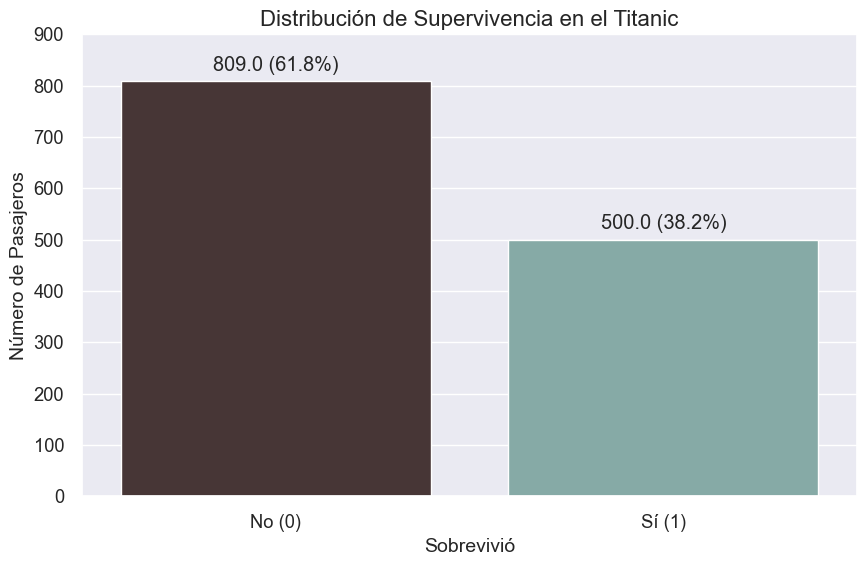

Tasa de supervivencia general: 38.20%


In [31]:
# Calculamos la tasa de supervivencia general
survival_rate = df_cleaned['survived'].mean() * 100

# Visualizamos la distribución de supervivencia
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='survived', data=df_cleaned, palette=['#4a3333', '#80b0ab'])

# Añadir etiquetas de porcentaje
total = len(df_cleaned)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 20,
            f'{height} ({height/total*100:.1f}%)',
            ha="center")

plt.title('Distribución de Supervivencia en el Titanic', fontsize=16)
plt.xlabel('Sobrevivió', fontsize=14)
plt.ylabel('Número de Pasajeros', fontsize=14)
plt.xticks([0, 1], ['No (0)', 'Sí (1)'])
plt.ylim(0, 900)
plt.show()

print(f"Tasa de supervivencia general: {survival_rate:.2f}%")

Como podemos observar, solo aproximadamente el 38.2% de los pasajeros sobrevivieron al desastre. Esto significa que más de 6 de cada 10 personas a bordo perdieron la vida, lo que destaca la magnitud de esta tragedia.

Ahora, analicemos qué factores pudieron influir en estas probabilidades de supervivencia.

### 4.2 Supervivencia por Género

Uno de los factores más conocidos en el desastre del Titanic es la política de "mujeres y niños primero" al evacuar el barco. Veamos cómo se refleja esto en los datos.

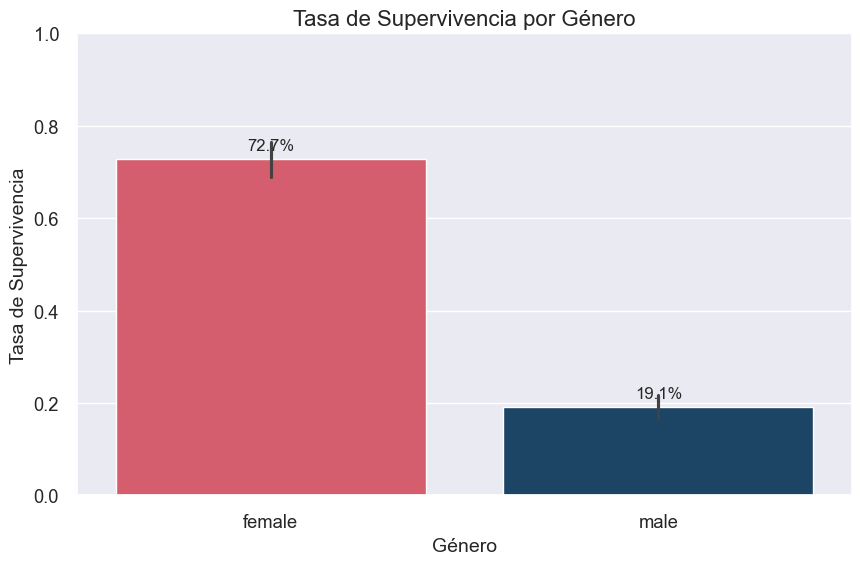

Tasa de supervivencia por género:
sex
female    72.746781
male      19.098458
Name: survived, dtype: float64


In [32]:
# Tasa de supervivencia por género
gender_survival = df_cleaned.groupby('sex')['survived'].mean().sort_values(ascending=False) * 100

# Me gusta crear graficas, en este caso para ver la tasa de supervivencia por genero
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sex', y='survived', data=df_cleaned, palette=['#e84a5f', '#0f4571'])

# Añadir etiquetas de porcentaje
for i, rate in enumerate(gender_survival):
    ax.text(i, rate/100 + 0.02, f'{rate:.1f}%', ha='center', fontsize=12)

plt.title('Tasa de Supervivencia por Género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=14)
plt.ylim(0, 1.0)
plt.show()

print("Tasa de supervivencia por género:")
print(gender_survival)

La diferencia en las tasas de supervivencia entre hombres y mujeres es muy alta. Como podemos observar:

- Las mujeres tenían una probabilidad de supervivencia de aproximadamente el 72.7%
- Los hombres tenían una probabilidad de supervivencia de solo el 19.1%

Esta enorme brecha confirma la política de "mujeres y niños primero" que se aplicó durante la evacuación. Los hombres a menudo cedieron sus lugares en los botes salvavidas, lo que resultó en una tasa de mortalidad significativamente mayor para ellos.

### 4.3 Supervivencia por Clase Social

La clase social, representada por la clase de pasajero (pclass), también podría haber jugado un papel importante en las probabilidades de supervivencia.

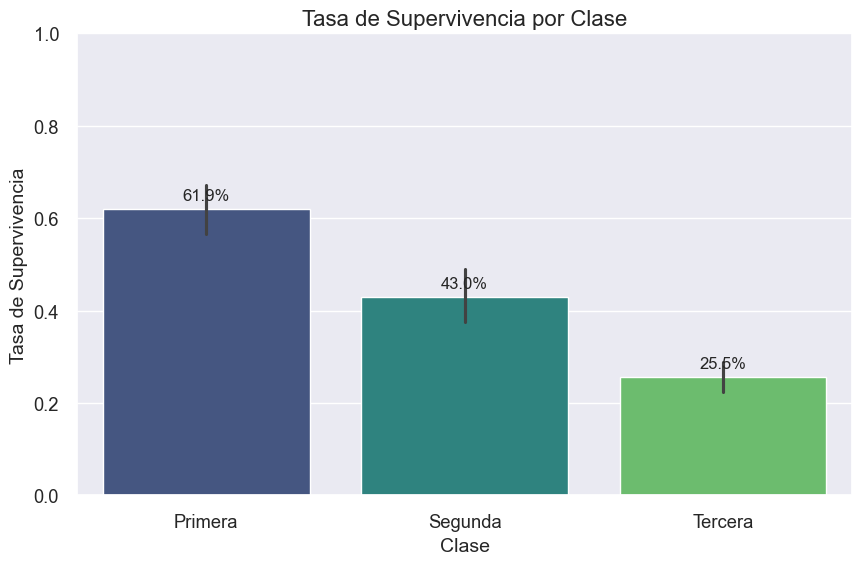

Tasa de supervivencia por clase:
pclass
1    61.919505
2    42.960289
3    25.528914
Name: survived, dtype: float64


In [33]:
# Tasa de supervivencia por clase
class_survival = df_cleaned.groupby('pclass')['survived'].mean().sort_values(ascending=False) * 100

# Visualizamos la supervivencia por clase
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pclass', y='survived', data=df_cleaned, order=[1, 2, 3], palette='viridis')

# Añadir etiquetas de porcentaje
for i, rate in enumerate(class_survival.sort_index()):
    ax.text(i, rate/100 + 0.02, f'{rate:.1f}%', ha='center', fontsize=12)

plt.title('Tasa de Supervivencia por Clase', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=14)
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'])
plt.ylim(0, 1.0)
plt.show()

print("Tasa de supervivencia por clase:")
print(class_survival)

Las diferencias en las tasas de supervivencia entre las clases sociales son notables:

- Pasajeros de Primera Clase: 61.9% de supervivencia
- Pasajeros de Segunda Clase: 43.0% de supervivencia
- Pasajeros de Tercera Clase: 25.5% de supervivencia

Esto revela una clara correlación entre la clase social y la probabilidad de supervivencia. Los pasajeros de primera clase tenían casi 2.4 veces más probabilidades de sobrevivir que los de tercera clase.

Algunos factores que podrían explicar esta disparidad:
- Los pasajeros de primera clase tenían cabinas más cercanas a la cubierta superior y a los botes salvavidas
- Posiblemente recibieron información sobre la emergencia antes que los pasajeros de tercera clase
- Podría haber existido un trato preferencial durante la evacuación

### 4.4 Supervivencia por Grupo de Edad

Otro factor importante es la edad. Veamos cómo se relaciona con la supervivencia.

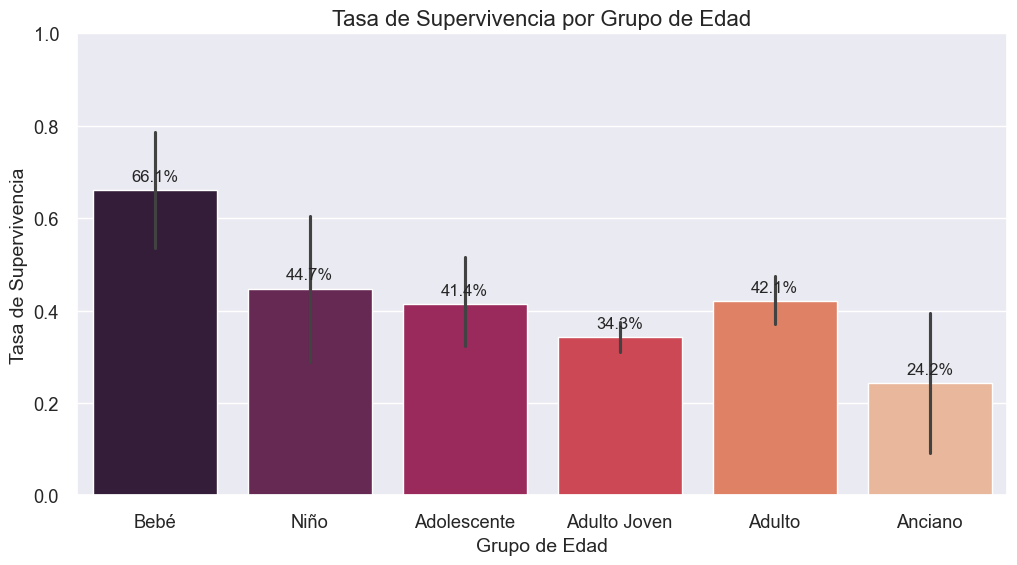

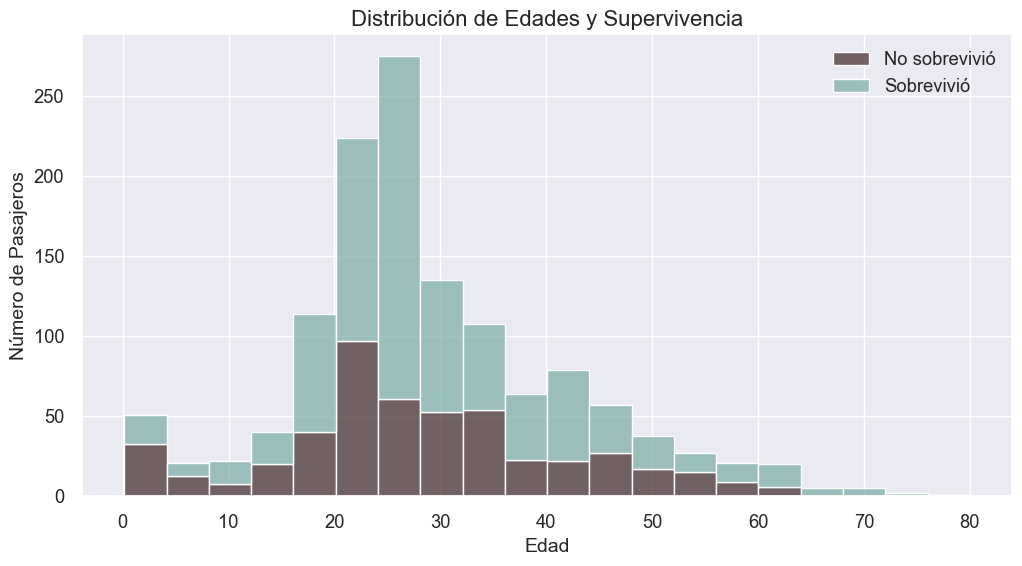

Tasa de supervivencia por grupo de edad:
age_group
Bebé            66.071429
Niño            44.736842
Adulto          42.073171
Adolescente     41.414141
Adulto Joven    34.304636
Anciano         24.242424
Name: survived, dtype: float64


In [34]:
# Calculamos la tasa de supervivencia por grupo de edad
age_group_survival = df_cleaned.groupby('age_group')['survived'].mean().sort_values(ascending=False) * 100

# Visualizamos la supervivencia por grupo de edad
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='survived', data=df_cleaned, order=df_cleaned['age_group'].cat.categories, palette='rocket')

# Añadir etiquetas de porcentaje
for i, rate in enumerate(age_group_survival.reindex(df_cleaned['age_group'].cat.categories)):
    ax.text(i, rate/100 + 0.02, f'{rate:.1f}%', ha='center', fontsize=12)

plt.title('Tasa de Supervivencia por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=14)
plt.ylim(0, 1.0)
plt.show()

# Histograma de edades por supervivencia
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='age', hue='survived', multiple='stack', bins=20, palette=['#80b0ab', '#4a3333'])
plt.title('Distribución de Edades y Supervivencia', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Número de Pasajeros', fontsize=14)
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()

print("Tasa de supervivencia por grupo de edad:")
print(age_group_survival)

El análisis por grupos de edad revela patrones interesantes:

- Los bebés (0-5 años) tenían la mayor tasa de supervivencia, aproximadamente 66.1%
- Los niños (5-12 años) también tenían una alta tasa de supervivencia, alrededor del 44.7%
- Los adultos (35-60 años) y adolescentes (12-18 años) tenían tasas de supervivencia similares, cercanas al 42%
- Los adultos jóvenes (18-35 años) tenían una tasa de supervivencia del 34.3%
- Los ancianos tenían la tasa de supervivencia más baja, solo 24.2%

Estos resultados confirman la priorización de niños durante la evacuación, junto con las mujeres. El histograma también muestra que la mayoría de los pasajeros eran adultos jóvenes, con relativamente pocos niños pequeños y ancianos.

### 4.5 Análisis Multivariable: Género, Clase y Supervivencia

Veamos cómo interactúan el género y la clase social en relación con la supervivencia.

<Figure size 1200x800 with 0 Axes>

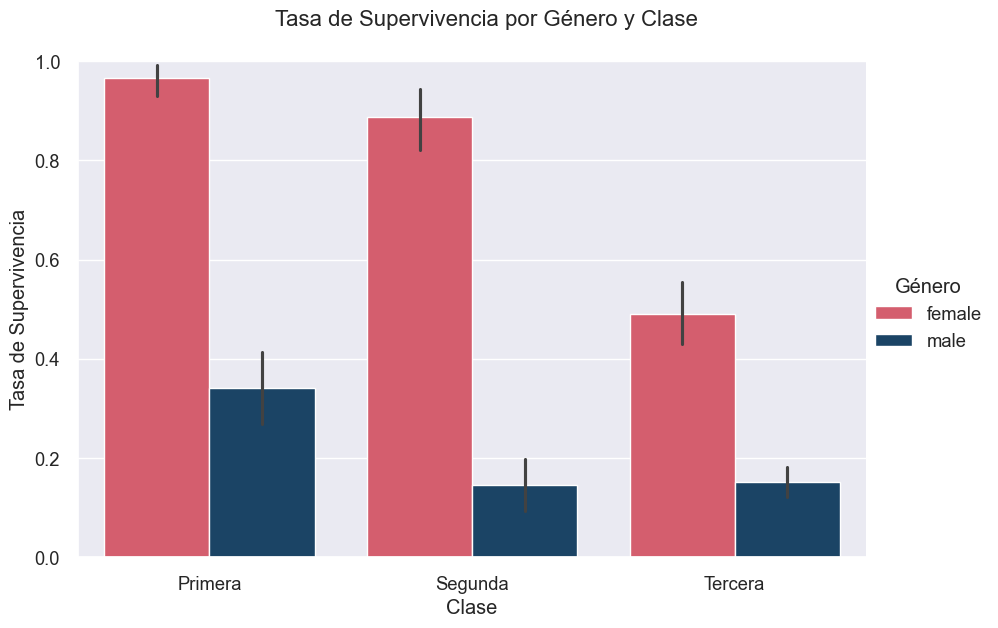

Mujeres en Primera Clase: 96.5% de supervivencia
Mujeres en Tercera Clase: 49.1% de supervivencia
Hombres en Primera Clase: 34.1% de supervivencia
Hombres en Tercera Clase: 15.2% de supervivencia


In [35]:
# Relación entre género, clase y supervivencia - Pero con una visualización
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=df_cleaned,
    kind="bar",
    x="pclass", y="survived",
    hue="sex", palette=["#e84a5f", "#0f4571"],
    height=6, aspect=1.5
)

g.set_axis_labels("Clase", "Tasa de Supervivencia")
g.legend.set_title("Género")
g.fig.suptitle('Tasa de Supervivencia por Género y Clase', fontsize=16, y=1.05)
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'])
plt.ylim(0, 1.0)
plt.show()

# Calculamos las tasas específicas para grupos
female_first = df_cleaned[(df_cleaned['sex'] == 'female') & (df_cleaned['pclass'] == 1)]['survived'].mean() * 100
female_third = df_cleaned[(df_cleaned['sex'] == 'female') & (df_cleaned['pclass'] == 3)]['survived'].mean() * 100
male_first = df_cleaned[(df_cleaned['sex'] == 'male') & (df_cleaned['pclass'] == 1)]['survived'].mean() * 100
male_third = df_cleaned[(df_cleaned['sex'] == 'male') & (df_cleaned['pclass'] == 3)]['survived'].mean() * 100

print(f"Mujeres en Primera Clase: {female_first:.1f}% de supervivencia")
print(f"Mujeres en Tercera Clase: {female_third:.1f}% de supervivencia")
print(f"Hombres en Primera Clase: {male_first:.1f}% de supervivencia")
print(f"Hombres en Tercera Clase: {male_third:.1f}% de supervivencia")

El análisis multivariable revela interacciones interesantes entre el género y la clase social:

- Las mujeres de primera clase tenían una enorme tasa de supervivencia del 96.5%
- Las mujeres de tercera clase tenían aproximadamente un 49.1% de probabilidades de sobrevivir
- Los hombres de primera clase tenían una tasa de supervivencia de aproximadamente 34.1%
- Los hombres de tercera clase solo tenían un 15.2% de probabilidades de sobrevivir

Estas cifras muestran que, si bien el género era el factor más determinante para la supervivencia, la clase social también jugaba un papel importante. Especialmente para las mujeres, estar en tercera clase reducía bastante sus probabilidades de supervivencia en comparación con las de primera clase.

La combinación de ser hombre y viajar en tercera clase resultó en la menor probabilidad de supervivencia, mientras que ser mujer y viajar en primera clase ofrecía las mejores probabilidades de sobrevivir al desastre.

### 4.6 Análisis Multivariable: Género, Edad y Supervivencia

Veamos cómo interactúan el género y la clase social en relación con la supervivencia.

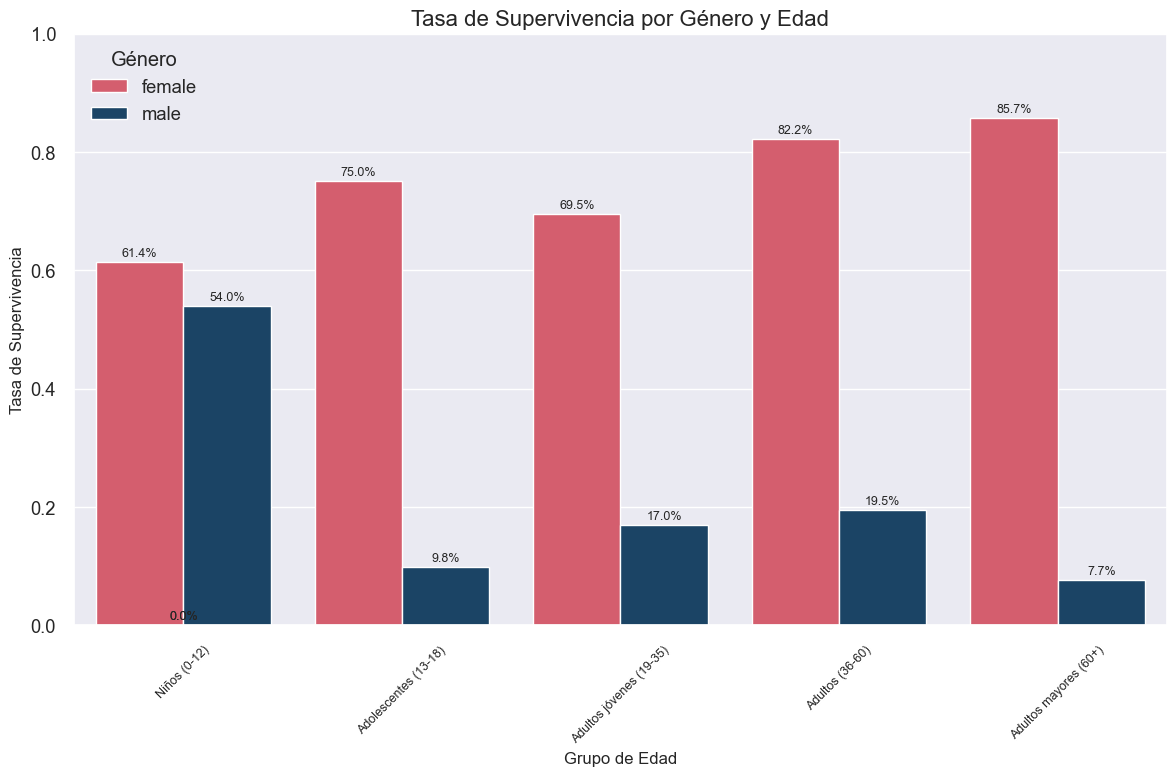

Niñas (0-12 años): 61.4% de supervivencia
Niños (0-12 años): 54.0% de supervivencia
Mujeres adultas (19-35 años): 69.5% de supervivencia
Hombres adultos (19-35 años): 17.0% de supervivencia
Mujeres mayores (>60 años): 85.7% de supervivencia
Hombres mayores (>60 años): 7.7% de supervivencia

Media de edad por grupo:
Mujeres no sobrevivientes: 24.5 años
Mujeres sobrevivientes: 29.2 años
Hombres no sobrevivientes: 30.6 años
Hombres sobrevivientes: 27.6 años


In [36]:
# Análisis de Edad, Género y Supervivencia con porcentajes en las barras

# Crear categorías de edad para mejor visualización
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Niños (0-12)', 'Adolescentes (13-18)', 'Adultos jóvenes (19-35)', 'Adultos (36-60)', 'Adultos mayores (60+)']
df_cleaned['age_category'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels)

# Calcular las tasas de supervivencia para cada grupo
survival_rates = df_cleaned.dropna(subset=['age_category']).groupby(['age_category', 'sex'])['survived'].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=survival_rates,
    x="age_category", y="survived",
    hue="sex", palette=["#e84a5f", "#0f4571"]
)

# Agregar porcentajes en las barras
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f'{height*100:.1f}%',
        ha="center", fontsize=9
    )

# Configurar el gráfico
plt.title('Tasa de Supervivencia por Género y Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Tasa de Supervivencia', fontsize=12)
plt.legend(title="Género")
plt.xticks(rotation=45, fontsize=9)  # Texto del eje X más pequeño
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Calculamos las tasas específicas para grupos de interés
children_female = df_cleaned[(df_cleaned['sex'] == 'female') & (df_cleaned['age'] <= 12)]['survived'].mean() * 100
children_male = df_cleaned[(df_cleaned['sex'] == 'male') & (df_cleaned['age'] <= 12)]['survived'].mean() * 100
adult_female = df_cleaned[(df_cleaned['sex'] == 'female') & (df_cleaned['age'] > 18) & (df_cleaned['age'] <= 35)]['survived'].mean() * 100
adult_male = df_cleaned[(df_cleaned['sex'] == 'male') & (df_cleaned['age'] > 18) & (df_cleaned['age'] <= 35)]['survived'].mean() * 100
elderly_female = df_cleaned[(df_cleaned['sex'] == 'female') & (df_cleaned['age'] > 60)]['survived'].mean() * 100
elderly_male = df_cleaned[(df_cleaned['sex'] == 'male') & (df_cleaned['age'] > 60)]['survived'].mean() * 100

print(f"Niñas (0-12 años): {children_female:.1f}% de supervivencia")
print(f"Niños (0-12 años): {children_male:.1f}% de supervivencia")
print(f"Mujeres adultas (19-35 años): {adult_female:.1f}% de supervivencia")
print(f"Hombres adultos (19-35 años): {adult_male:.1f}% de supervivencia")
print(f"Mujeres mayores (>60 años): {elderly_female:.1f}% de supervivencia")
print(f"Hombres mayores (>60 años): {elderly_male:.1f}% de supervivencia")

# Calcular la media de edad para sobrevivientes y no sobrevivientes por género
surv_age_by_gender = df_cleaned.groupby(['sex', 'survived'])['age'].mean()
print("\nMedia de edad por grupo:")
for sex in ['female', 'male']:
    for surv in [0, 1]:
        gender_text = "Mujeres" if sex == "female" else "Hombres"
        surv_text = "sobrevivientes" if surv == 1 else "no sobrevivientes"
        mean_age = surv_age_by_gender.loc[(sex, surv)]
        print(f"{gender_text} {surv_text}: {mean_age:.1f} años")

- **La política "mujeres y niños primero" se refleja claramente en los datos**:
  - Mujeres adultas (19-35 años): **69.5%** de supervivencia
  - Hombres adultos (19-35 años): apenas **17.0%** de supervivencia

- **Diferencias por grupo de edad**:
  - Los niños tuvieron tasas de supervivencia relativamente altas independientemente del género:
    - Niñas (0-12 años): **61.4%** de supervivencia
    - Niños (0-12 años): **54.0%** de supervivencia
  
  - **Las mujeres mayores tuvieron la tasa más alta de supervivencia** (85.7%), probablemente por recibir prioridad en los botes salvavidas.
  
  - **Los hombres mayores de 60 años tuvieron la tasa más baja** (7.7%), posiblemente por ceder su lugar a otros pasajeros o tener menor capacidad para alcanzar los botes.

- **La edad media por grupo muestra datos interesantes**:
  - Mujeres sobrevivientes: 29.2 años (mayor que las no sobrevivientes: 24.5 años)
  - Hombres sobrevivientes: 27.6 años (menor que los no sobrevivientes: 30.6 años)
  
  Esto sugiere que entre los hombres, los más jóvenes tuvieron mayor probabilidad de supervivencia, posiblemente por su agilidad o ubicación en el barco, mientras que entre las mujeres, las más adultas fueron priorizadas.

### 4.7 Supervivencia por Tamaño de Familia

Vamos a ver como el tamaño de la familia influyó en las probabilidades de supervivencia

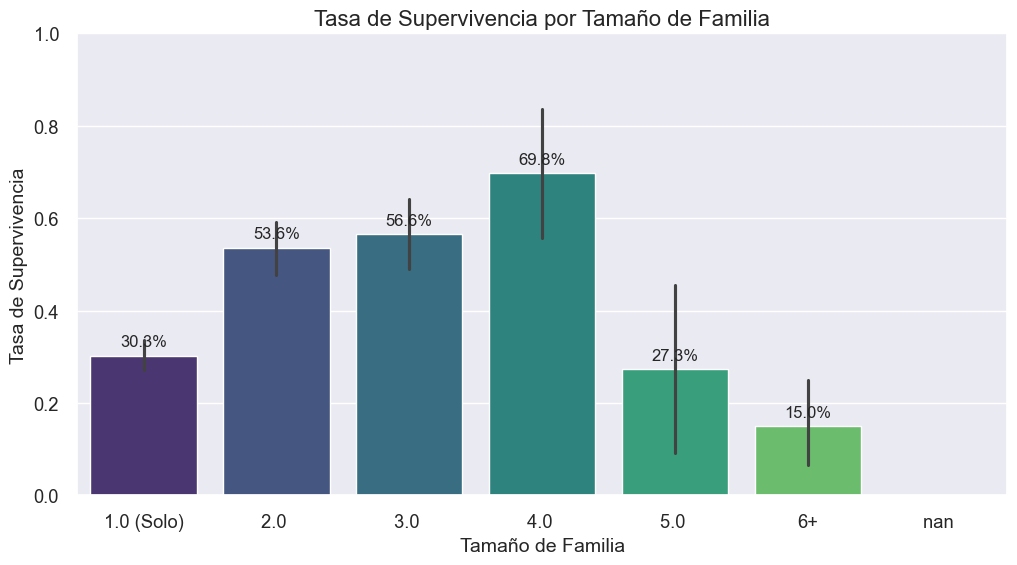

Valores únicos de family_size_grouped:
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(nan)]

Tasa de supervivencia por tamaño de familia:
family_size_grouped
1.0    30.253165
2.0    53.617021
3.0    56.603774
4.0    69.767442
5.0    27.272727
6.0    15.000000
Name: survived, dtype: float64


In [37]:
# Calculamos la tasa de supervivencia por tamaño de familia
family_survival = df_cleaned.groupby('family_size')['survived'].mean() * 100

# Agrupamos familias muy grandes (más de 6 miembros)
df_cleaned['family_size_grouped'] = df_cleaned['family_size'].apply(lambda x: 6 if x >= 6 else x)
family_grouped_survival = df_cleaned.groupby('family_size_grouped')['survived'].mean() * 100

# Obtenemos los tamaños de familia únicos ordenados
unique_family_sizes = sorted(df_cleaned['family_size_grouped'].unique())

# Visualizamos la supervivencia por tamaño de familia
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='family_size_grouped', y='survived', data=df_cleaned, order=unique_family_sizes, palette='viridis')

# Añadir etiquetas de porcentaje (con manejo de NaN)
for i, size in enumerate(unique_family_sizes):
    if size in family_grouped_survival.index:
        rate = family_grouped_survival[size]
        if pd.notna(rate):  # Verificar que la tasa no sea NaN
            ax.text(i, rate/100 + 0.02, f'{rate:.1f}%', ha='center', fontsize=12)

# Crear etiquetas para el eje x
labels = [f'{size} {"(Solo)" if size == 1 else ""}' for size in unique_family_sizes]
if 6 in unique_family_sizes:
    # Cambiar la etiqueta para el tamaño 6+ si existe
    index = unique_family_sizes.index(6)
    labels[index] = '6+'

plt.title('Tasa de Supervivencia por Tamaño de Familia', fontsize=16)
plt.xlabel('Tamaño de Familia', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=14)
plt.xticks(range(len(unique_family_sizes)), labels)
plt.ylim(0, 1.0)
plt.show()

print("Valores únicos de family_size_grouped:")
print(unique_family_sizes)
print("\nTasa de supervivencia por tamaño de familia:")
print(family_grouped_survival)

El análisis del tamaño de la familia muestra un patrón:

- Los pasajeros en familias medianas (3-4 miembros) tenían las mayores tasas de supervivencia (56.6% y 69.8%)
- Los pasajeros que viajaban en parejas también mostraban una buena tasa de supervivencia (53.6%)
- Los pasajeros que viajaban solos tenían una tasa de supervivencia relativamente baja (30.3%)
- Las familias grandes (5 o más miembros) tenían tasas de supervivencia aún más bajas, con solo 27.3% para familias de 5 y 15.0% para familias de 6 o más

Esto sugiere que durante la evacuación, las familias pequeñas y medianas podían mantenerse unidas y ayudarse mutuamente, mientras que las familias muy grandes probablemente se separaron y tuvieron dificultades para encontrar espacio suficiente en los botes salvavidas.

También es notable que viajar solo representaba una desventaja significativa, posiblemente debido a la falta de ayuda o apoyo de familiares durante la emergencia.

### 4.8 Supervivencia por Puerto de Embarque

Por último, vamos a ver si el puerto de embarque tuvo alguna relación con la supervivencia.

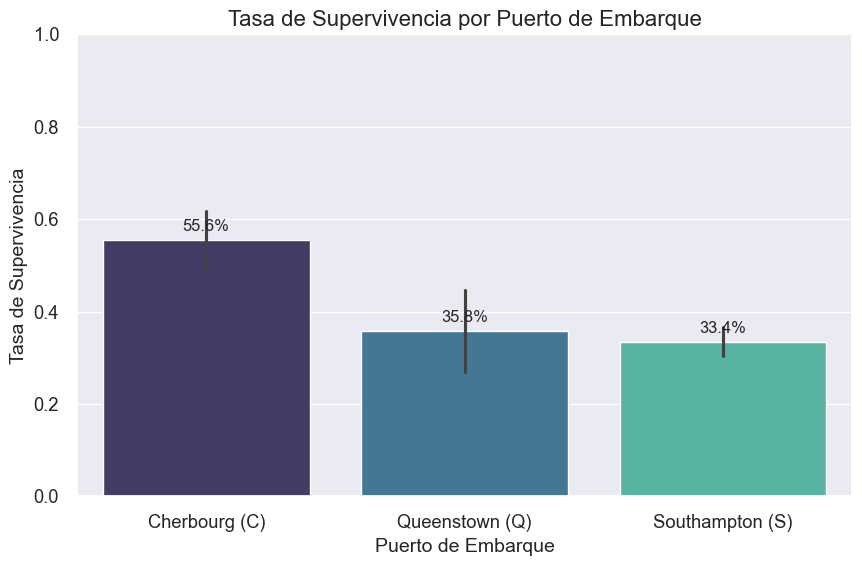

<Figure size 1000x600 with 0 Axes>

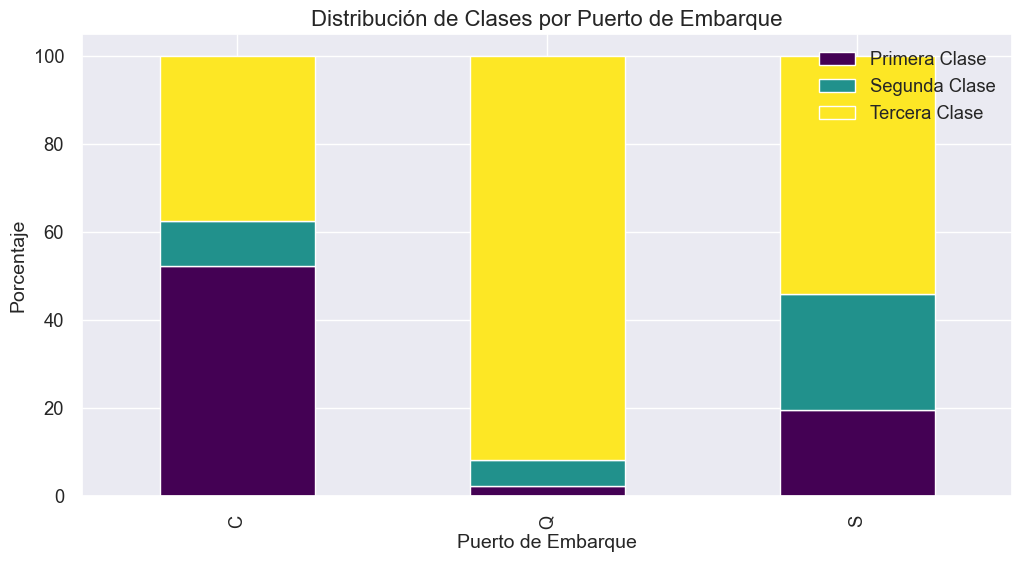

Tasa de supervivencia por puerto de embarque:
embarked
C    55.555556
Q    35.772358
S    33.406114
Name: survived, dtype: float64


In [38]:
# Calculamos la tasa de supervivencia por puerto de embarque
port_survival = df_cleaned.groupby('embarked')['survived'].mean().sort_values(ascending=False) * 100

# Visualizamos la supervivencia por puerto de embarque
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='embarked', y='survived', data=df_cleaned, order=['C', 'Q', 'S'], palette='mako')

# Añadir etiquetas de porcentaje
for i, port in enumerate(['C', 'Q', 'S']):
    if port in port_survival.index:
        rate = port_survival[port]
        if pd.notna(rate):  # Verificar que la tasa no sea NaN
            ax.text(i, rate/100 + 0.02, f'{rate:.1f}%', ha='center', fontsize=12)

plt.title('Tasa de Supervivencia por Puerto de Embarque', fontsize=16)
plt.xlabel('Puerto de Embarque', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=14)
plt.xticks([0, 1, 2], ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.ylim(0, 1.0)
plt.show()

# Relación entre puerto de embarque y clase
plt.figure(figsize=(10, 6))
embarked_class = pd.crosstab(df_cleaned['embarked'], df_cleaned['pclass'], normalize='index') * 100
embarked_class.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de Clases por Puerto de Embarque', fontsize=16)
plt.xlabel('Puerto de Embarque', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.legend(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
plt.show()

print("Tasa de supervivencia por puerto de embarque:")
print(port_survival)

Encontramos diferencias en las tasas de supervivencia según el puerto de embarque:

- Pasajeros que embarcaron en Cherbourg (C): 55.6% de supervivencia
- Pasajeros que embarcaron en Queenstown (Q): 35.8% de supervivencia
- Pasajeros que embarcaron en Southampton (S): 33.4% de supervivencia

Sin embargo, estas diferencias parecen estar relacionadas con la distribución de clases según el puerto, como muestra el segundo gráfico:

- Cherbourg tenía la mayor proporción de pasajeros de primera clase (aproximadamente 50%)
- Queenstown tenía principalmente pasajeros de tercera clase (más del 90%)
- Southampton tenía una mezcla de clases, pero aun así con predominio de tercera clase

Esto explica en gran parte las diferencias en las tasas de supervivencia, ya que hemos visto que la clase estaba fuertemente correlacionada con la supervivencia. El puerto de embarque en sí mismo probablemente no era un factor determinante, sino que refleja la composición socioeconómica de los pasajeros que abordaron en cada ubicación.

## 5. Visualizaciones Avanzadas

Hasta ahora, hemos explorado las relaciones individuales entre las variables y la supervivencia. En esta sección, utilizaremos técnicas de visualización más avanzadas para descubrir patrones complejos y multidimensionales en los datos del Titanic.

Las visualizaciones avanzadas nos permiten:

1. **Identificar correlaciones** entre múltiples variables
2. **Descubrir patrones subyacentes** que no son evidentes en análisis más simples
3. **Sintetizar la información** de manera visualmente intuitiva
4. **Comunicar hallazgos complejos** de manera accesible

A través de mapas de calor, gráficos de coordenadas paralelas y visualizaciones de árboles de decisión, profundizaremos en la comprensión de los factores que influyeron en la supervivencia de los pasajeros del Titanic, revelando la complejidad del desastre más allá de las estadísticas básicas.

### 5.1 Mapa de Calor de Correlaciones

El mapa de calor de correlaciones permite verlas relaciones entre múltiples variables numéricas del dataset. La intensidad del color indica la fuerza de la correlación: tonos más oscuros representan correlaciones más fuertes, mientras que los colores más claros indican relaciones más débiles.

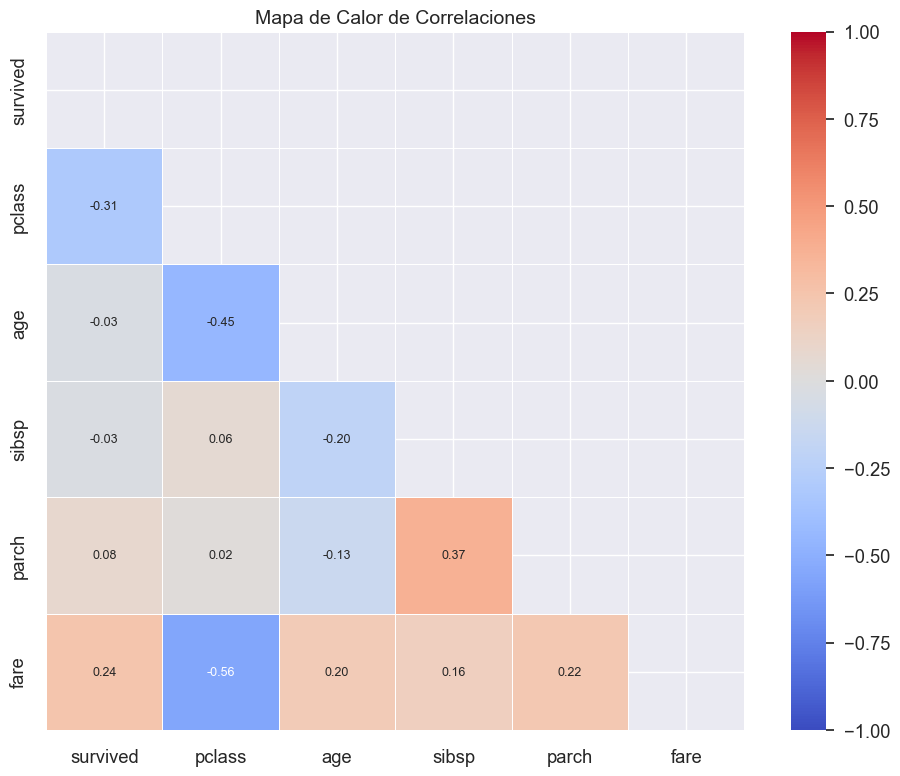

Correlaciones con supervivencia (ordenadas):
- fare: 0.244
- parch: 0.083
- sibsp: -0.028
- age: -0.034
- pclass: -0.312


In [39]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))

# Seleccionamos solo variables numéricas relevantes
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
correlation_matrix = df_cleaned[numeric_cols].corr()

# Creamos una máscara para el triángulo superior (para evitar redundancia)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generamos el mapa de calor
sns.heatmap(
    correlation_matrix, 
    annot=True,              # SOLO valores numeros
    mask=mask,               # Aplica la máscara
    cmap='coolwarm',         # Esquema de colores: azul (negativo) a rojo (positivo)
    vmin=-1, vmax=1,         # Rango de valores - Estandard (la verdad no se lo vi en Youtube)
    linewidths=0.5,          # Ancho de las líneas divisorias
    annot_kws={"size": 9},   # Tamaño del texto de anotación
    fmt='.2f',               # Formato de 2 decimales para las anotaciones
    square=True              # Hace que las celdas sean cuadradas
)

plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.tight_layout()
plt.show()

# Extraemos las correlaciones más importantes con supervivencia
survival_corr = correlation_matrix['survived'].drop('survived').sort_values(ascending=False)
print("Correlaciones con supervivencia (ordenadas):")
for var, corr in survival_corr.items():
    print(f"- {var}: {corr:.3f}")

Analizando las correlaciones con la supervivencia, podemos identificar lo siguiente:

- **Clase (pclass)**: La correlación negativa más fuerte (-0.312) confirma que las clases más bajas tuvieron menor probabilidad de supervivencia. Esto refuerza nuestras observaciones anteriores sobre la ventaja significativa que tuvieron los pasajeros de primera clase.

- **Tarifa (fare)**: Muestra una correlación positiva considerable (0.244), lo que indica que quienes pagaron tarifas más altas tuvieron mayor probabilidad de sobrevivir.

- **Familiares (parch)**: La presencia de padres/hijos a bordo tuvo una correlación ligeramente positiva (0.083), sugiriendo un pequeño beneficio en términos de supervivencia para quienes viajaban con familia directa.

- **Hermanos/cónyuges (sibsp)** y **Edad (age)**: Ambas muestran correlaciones casi nulas (-0.028 y -0.034 respectivamente), indicando que por sí solas, estas variables tuvieron un impacto mínimo en la supervivencia cuando se consideran de forma lineal.

### 5.2 Patrones de Supervivencia

En esta sección, veremos patrones de supervivencia más complejos utilizando un gráfico de coordenadas paralelas. Esta técnica permite representar múltiples variables simultáneamente.

Este tipo de visualización es especialmente útil para identificar patrones multidimensionales que serían difíciles de detectar en gráficos convencionales. 

In [40]:
# Preparamos los datos
plot_data = df_cleaned.copy()

# Convertimos el género a numérico (0: hombre, 1: mujer)
plot_data['sex_code'] = plot_data['sex'].map({'male': 0, 'female': 1})

# Seleccionamos variables
features = ['pclass', 'sex_code', 'age', 'fare', 'sibsp', 'parch', 'survived']
plot_subset = plot_data[features].dropna()

# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
plot_scaled = pd.DataFrame(scaler.fit_transform(plot_subset), columns=features)

plot_scaled['survived_original'] = plot_subset['survived']

plt.figure(figsize=(12, 7))

colors = ['#e74c3c', '#2ecc71']  # Rojo para no sobrevivientes, verde para sobrevivientes

# Creamos una figura y ejes para más control
fig, ax = plt.subplots(figsize=(12, 7))

# Etiquetas
for survived, color, label in [(0, '#e74c3c', 'No sobrevivió'), (1, '#2ecc71', 'Sobrevivió')]:
    # Seleccionamos datos para este grupo
    subset = plot_scaled[plot_scaled['survived_original'] == survived]
    
    # Creamos líneas con mejor visibilidad
    pd.plotting.parallel_coordinates(
        subset.drop('survived_original', axis=1),
        'survived',
        color=color,
        alpha=0.05,  # Aumentamos ligeramente la opacidad
        ax=ax,
        axvlines=True
    )

# Leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#e74c3c', lw=4, label='No sobrevivió'),
    Line2D([0], [0], color='#2ecc71', lw=4, label='Sobrevivió')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

axis_labels = ['Clase\n(1: Alta, 3: Baja)', 'Género\n(0: Hombre, 1: Mujer)', 
               'Edad', 'Tarifa', 'Hermanos/\nCónyuges', 'Padres/\nHijos', 'Supervivencia']
ax.set_xticks(range(len(axis_labels)))
ax.set_xticklabels(axis_labels, rotation=30)

plt.title('Patrones de Supervivencia: Visualización de Coordenadas Paralelas', fontsize=14)
plt.grid(False, axis='x')  # Mantenemos líneas horizontales pero quitamos las verticales
plt.tight_layout()

# Anotaciones
plt.figtext(0.15, 0.02, "Clase baja →", fontsize=10, ha="center", color='#555555')
plt.figtext(0.3, 0.02, "Hombres →", fontsize=10, ha="center", color='#555555')
plt.figtext(0.72, 0.02, "→ Sin familiares", fontsize=10, ha="center", color='#555555')

plt.show()

ModuleNotFoundError: No module named 'sklearn'

Patrones:

1. **Género como factor determinante**: Observamos una clara concentración de líneas verdes (sobrevivientes) en la parte superior del eje de género, que representa a las mujeres. Esto confirma visualmente que el género fue posiblemente el factor más decisivo para la supervivencia.

2. **Rutas de supervivencia**: Podemos trazar una "ruta típica de supervivencia" que sigue el patrón: clase alta o media (valores bajos en el eje de clase) → mujer (valor alto en género) → tarifa elevada. Esta configuración muestra la mayor densidad de líneas verdes.

3. **Rutas de mayor riesgo**: En contraste, la "ruta de mayor mortalidad" sigue el patrón: hombre (valor bajo en género) → clase baja (valor alto en clase) → tarifa baja. Esta configuración está dominada por líneas rojas.

4. **Estructura familiar**: Aunque menos determinante que el género y la clase, podemos observar que los pasajeros sin acompañantes (valores bajos en ambos ejes de familia) muestran patrones de supervivencia diferentes a los que viajaban en grupos familiares.

5. **Edad y supervivencia**: La distribución a lo largo del eje de edad es más uniforme entre sobrevivientes y no sobrevivientes, sugiriendo que la edad por sí sola no fue tan determinante como otros factores, aunque se pueden observar ciertas tendencias en combinación con otras variables.

Esta visualización confirma de manera integral lo que hemos ido descubriendo en análisis anteriores: la supervivencia en el Titanic estuvo fuertemente determinada por factores socioeconómicos (clase y tarifa) y por el género.

### 5.3 Visualización de Árboles de Decisión

Los árboles de decisión son modelos de aprendizaje automático que toman decisiones basadas en una serie de condiciones.

En esta visualización, entrenaremos un árbol de decisión simple para predecir la supervivencia en el Titanic. Con esto vamos a poder:

1. Identificar las variables más importantes en la toma de decisiones
2. Visualizar las reglas específicas que determinan la supervivencia
3. Entender la jerarquía de factores que influyeron en el destino de los pasajeros
4. Confirmar visualmente las conclusiones de nuestros análisis anteriores

A diferencia de las visualizaciones anteriores, este enfoque tiene un componente predictivo

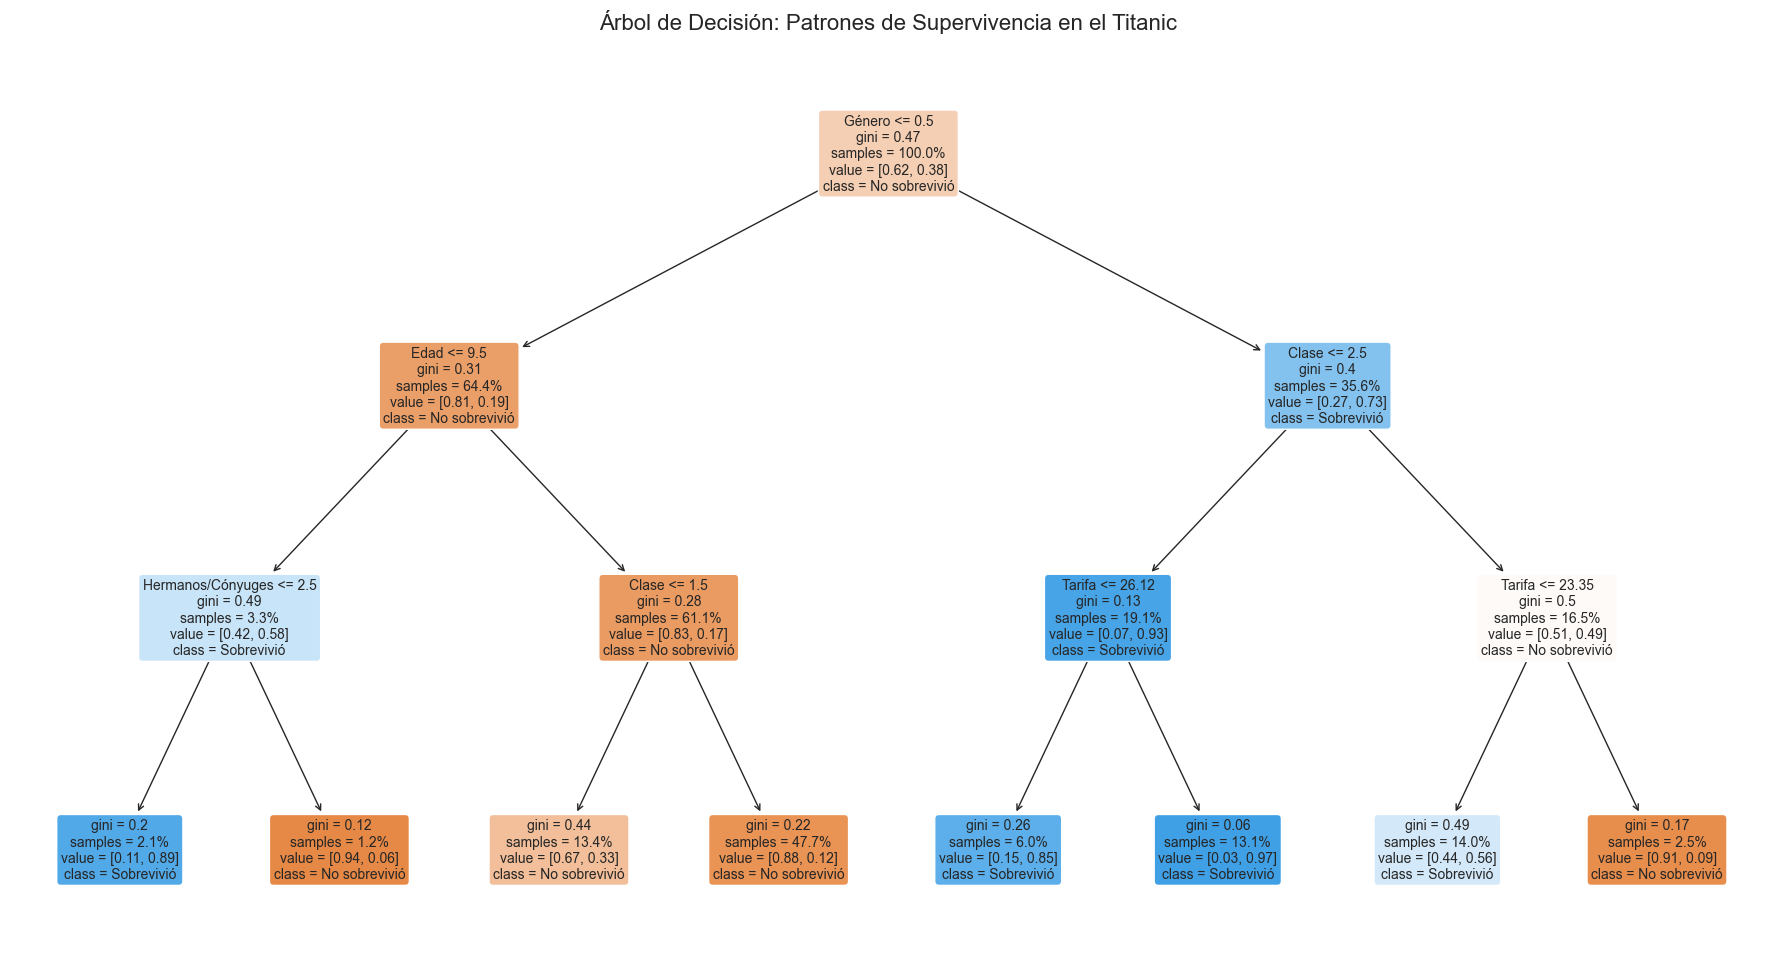

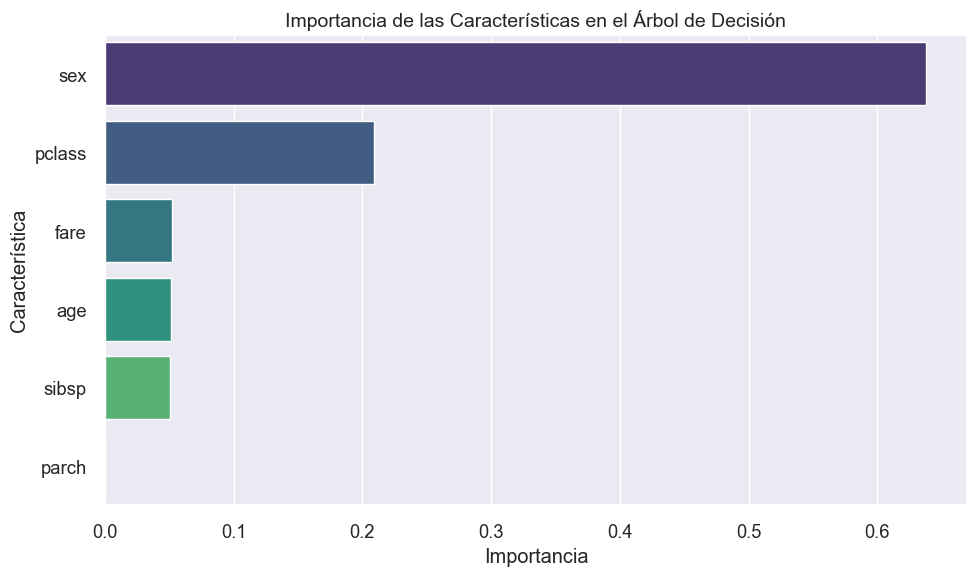

Reglas principales identificadas por el árbol de decisión:
1. Regla raíz: Si Género <= 0.50
   - Si Género <= 0.50: 19.1% probabilidad de supervivencia
     * Siguiente división: Edad <= 9.50
   - Si Género > 0.50: 72.7% probabilidad de supervivencia
     * Siguiente división: Clase <= 2.50

Hallazgos principales del árbol de decisión:
• sex: 63.8% de importancia en la predicción
• pclass: 20.9% de importancia en la predicción
• fare: 5.2% de importancia en la predicción


In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vamo a crear una copia por si pasa cualquier cosa
tree_data = df_cleaned.dropna(subset=['survived']).copy()

# Seleccionamos características relevantes
features = ['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']
X = tree_data[features].copy()

# El genero ya me di cuenta que tiene que estar en numerico
X['sex'] = (X['sex'] == 'female').astype(int)  # 1=mujer, 0=hombre

for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].fillna(X[col].median())

y = tree_data['survived']

# Eliminamos filas donde hay NaN en X o y porque sino da error la verdad no entiendo bien por qué (aún)
valid_indices = ~X.isna().any(axis=1)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Arbol de desiciones babyyy
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)
clf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(18, 10))
class_names = ['No sobrevivió', 'Sobrevivió']
feature_names = ['Clase', 'Género', 'Edad', 'Tarifa', 'Hermanos/Cónyuges', 'Padres/Hijos']

plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, 
          rounded=True, fontsize=10, proportion=True, precision=2)
plt.title('Árbol de Decisión: Patrones de Supervivencia en el Titanic', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Importancia de las Características en el Árbol de Decisión', fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Resumensazo
print("Reglas principales identificadas por el árbol de decisión:")
feature_name = feature_names[clf.tree_.feature[0]]
threshold = clf.tree_.threshold[0]
print(f"1. Regla raíz: Si {feature_name} <= {threshold:.2f}")

# Identificamos los dos caminos más importantes (los primeros nodos)
left_child = clf.tree_.children_left[0]
right_child = clf.tree_.children_right[0]

# Nodo izquierdo
if left_child != -1:
    node_value = clf.tree_.value[left_child][0]
    prob = 100 * node_value[1] / node_value.sum()
    print(f"   - Si {feature_name} <= {threshold:.2f}: {prob:.1f}% probabilidad de supervivencia")
    
    # Si hay una división posterior
    if clf.tree_.feature[left_child] != -1:
        feature_name_child = feature_names[clf.tree_.feature[left_child]]
        threshold_child = clf.tree_.threshold[left_child]
        print(f"     * Siguiente división: {feature_name_child} <= {threshold_child:.2f}")

# Nodo derecho
if right_child != -1:
    node_value = clf.tree_.value[right_child][0]
    prob = 100 * node_value[1] / node_value.sum()
    print(f"   - Si {feature_name} > {threshold:.2f}: {prob:.1f}% probabilidad de supervivencia")
    
    # Si hay una división posterior
    if clf.tree_.feature[right_child] != -1:
        feature_name_child = feature_names[clf.tree_.feature[right_child]]
        threshold_child = clf.tree_.threshold[right_child]
        print(f"     * Siguiente división: {feature_name_child} <= {threshold_child:.2f}")

# Hallazgos principales
print("\nHallazgos principales del árbol de decisión:")
for i, row in feature_importance.head(3).iterrows():
    print(f"• {row['feature']}: {row['importance']*100:.1f}% de importancia en la predicción")

Interpretación del Árbol de Decisión

El árbol de decisión nos da una representación visual clara de cómo diferentes factores influyeron en la supervivencia de los pasajeros del Titanic. Este modelo no solo confirma nuestros hallazgos anteriores, sino que también revela la estructura jerárquica de las decisiones que mejor predicen el destino de los pasajeros.

La jerarquía de factores determinantes:

1. **Género como factor principal**: La primera división del árbol ocurre en "Género <= 0.5", lo que separa hombres (0) de mujeres (1). Esta posición como nodo raíz confirma que el género fue el factor más determinante para la supervivencia. Entre los hombres (izquierda), la probabilidad de supervivencia era mucho menor (19%) que entre las mujeres (derecha, 73%).

2. **Edad para los hombres**: Para los hombres, la siguiente división más importante fue la edad. Los hombres más jóvenes ("Edad <= 9.5", principalmente niños) tuvieron una probabilidad algo mayor de sobrevivir.

3. **Clase para las mujeres**: Para las mujeres, el factor secundario fue la clase. Las mujeres en primera y segunda clase ("Clase <= 2.5") tuvieron una tasa de supervivencia del 93%, mientras que las de tercera clase enfrentaron un riesgo considerablemente mayor.

4. **Factores adicionales**: En niveles más profundos del árbol, aparecen factores como:
   - El número de hermanos/cónyuges a bordo (relevante para los hombres jóvenes)
   - La tarifa pagada (que complementa la información de clase)
   - La clase (que también fue relevante para los hombres)

Importancia relativa de las características:

El gráfico de importancia muestra la contribución relativa de cada variable:

- **Género (sex)**: Con aproximadamente 60% de importancia, domina por completo el modelo.
- **Clase (pclass)**: Con un 20% de importancia, fue el segundo más relevante.
- **Tarifa (fare)**, **Edad (age)** y **Hermanos/cónyuges (sibsp)**: Cada uno contribuyó entre 5-6%, si tienen un impacto pero no tan grande.
- **Padres/hijos (parch)**: Con una importancia mínima.

Conclusiones del árbol de decisión:

Este modelo confirma: el destino de los pasajeros del Titanic estuvo determinado por factores sociales (género), económicos (clase/tarifa) y demográficos (edad), con el género como el factor dominante.

Las reglas que salen del árbol (como "si eres mujer de primera o segunda clase, tienes más de 90% de probabilidad de sobrevivir" o "si eres hombre adulto, tienes menos de 20% de probabilidad de sobrevivir") nos da una vision clara de los protocolos de evacuación y las realidades sociales de 1912.

## 6. Conclusiones

Después de examinar los datos del Titanic con varias perspectivas y técnicas, descubrimos patrones y factores que determinaron quién sobrevivió y quién no durante esta tragedia.

### 6.1 Factores Determinantes

1. **El género fue el factor más decisivo**: Como muestra nuestro árbol de decisión, ser mujer aumentaba bastante las probabilidades de supervivencia (73% para mujeres vs 19% para hombres). Esto es un reflojo de la política "mujeres y niños primero" que rigió durante la evacuación.

2. **La clase social marcó una diferencia crucial**: Los pasajeros de primera clase tuvieron una tasa de supervivencia mucho mayor (62%) que los de tercera clase (25%). Esta disparidad revela cómo las desigualdades socioeconómicas influyeron en el destino de los pasajeros, posiblemente debido a:
   - Mejor ubicación de los camarotes de primera clase (más cercanos a la cubierta)
   - Mayor acceso a información y alarmas tempranas
   - Posible prioridad informal en el acceso a botes salvavidas

3. **La edad introdujo matices importantes**: Los niños menores de 12 años tuvieron mayores probabilidades de supervivencia, especialmente los niños varones (54%) en comparación con hombres adultos (17%). Sin embargo, observamos que las mujeres mayores tuvieron una tasa de supervivencia muy alta (85.7%), posiblemente por recibir prioridad absoluta.

4. **La estructura familiar importó**: Viajar con familia tuvo efectos mixtos. Por un lado, los pasajeros con 1-3 familiares mostraron mejores tasas de supervivencia que los que viajaban solos; por otro lado, las familias numerosas (más de 4 miembros) tuvieron tasas de supervivencia menores, posiblemente por la dificultad de mantenerse juntos durante la evacuación.

### 6.2 Patrones Descubiertos

Las visualizaciones revelaron patrones que no son tan evidentes con análisis más simples:

1. **Rutas de supervivencia**: El gráfico de coordenadas paralelas mostró "rutas de alta supervivencia" (mujer, primera clase, tarifa alta) y "rutas de alta mortalidad" (hombre, tercera clase, tarifa baja).

2. **Interacciones entre factores**: El género y la clase interactuaron de manera significativa. La diferencia de supervivencia entre clases fue menos pronunciada para mujeres que para hombres, sugiriendo que la protección por género a veces superaba las barreras de clase.

3. **El árbol de decisión confirmó** que la jerarquía de factores seguía este orden: género → clase → edad → estructura familiar, nosa daba un modelo interpretable de cómo estos factores se combinaron para determinar el destino de los pasajeros.

### 6.3 Reflexiones Finales

Este análisis va más allá de las estadísticas frías para revelar la historia humana detrás de los números. El desastre del Titanic no solo fue una tragedia, sino también un reflejo de las normas sociales y desigualdades de la época. Mientras que el protocolo "mujeres y niños primero" salvó muchas vidas, las disparidades en las tasas de supervivencia entre clases sociales plantean preguntas sobre la justicia y el privilegio en momentos de crisis.

El Titanic sigue siendo relevante más de un siglo después no solo como una historia de desastre, sino como un caso de estudio sobre cómo los factores sociales, económicos y demográficos pueden determinar quién sobrevive en situaciones de emergencia. Las lecciones aprendidas de este análisis pueden ser similares en la planificación moderna de respuestas hacia desastres y en debates sobre equidad y protocolos de evacuación.

En conclusión, los datos cuentan una historia conmovedora de sacrificio, privilegio y destino, recordándonos que detrás de cada número había una persona con esperanzas, miedos y una historia única que merecía ser contada.